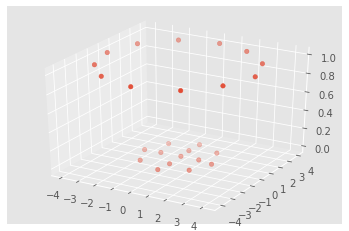

Total values: 25
row: 0 --- original: 1.0 predicted: 0.4850610739494529
Total values: 25
row: 1 --- original: 1.0 predicted: 0.48421059822041435
Total values: 25
row: 2 --- original: 1.0 predicted: 0.48436740932876576
Total values: 25
row: 3 --- original: 1.0 predicted: 0.4822487112911985
Total values: 25
row: 4 --- original: 0.0 predicted: 0.4842503965718575
Total values: 25
row: 5 --- original: 1.0 predicted: 0.4821015803525577
Total values: 25
row: 6 --- original: 0.0 predicted: 0.483321387195052
Total values: 25
row: 7 --- original: 0.0 predicted: 0.48331199004226183
Total values: 25
row: 8 --- original: 0.0 predicted: 0.48329485000327943
Total values: 25
row: 9 --- original: 1.0 predicted: 0.47897331724002734
Total values: 25
row: 10 --- original: 0.0 predicted: 0.48150854537752436
Total values: 25
row: 11 --- original: 0.0 predicted: 0.48085689924683445
Total values: 25
row: 12 --- original: 0.0 predicted: 0.4808847692960641
Total values: 25
row: 13 --- original: 1.0 predicted: 0

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

tr = np.array([[1,-3.98,-0.12,1],[1,-3.464,-2.11,1],[1,-3.461,1.89,1],[1,-2.22,-3.474,1],[1,-2.02,0.03,0],[1,-2.01,3.459,1],[1,-1.42,-1.409,0],[1,-1.416,1.419,0],[1,-1.09,0.08,0],[1,-0.19,-4.13,1],[1,0.01,1.02,0],[1,0.03,-2.12,0],[1,0.04,2.06,0],[1,0.06,3.97,1],[1,0.07,0.1,0],[1,0.12,-1.12,0],[1,1.11,0.09,0],[1,1.411,1.419,0],[1,1.414,-1.415,0],[1,1.86,3.47,1],[1,1.96,-0.12,0],[1,2.11,-3.472,1],[1,3.461,-1.87,1],[1,3.464,2.07,1],[1,4.12,0.09,1]],dtype=float)

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
x = tr[:,1]
y = tr[:,2]
z = tr[:,3]
ax1.scatter(x,y,z)

# show half of the point labels
for i in range(len(data)):
  if i%2==0:
    s = str(x[i])+str(y[i])
    #ax1.text(x[i],y[i],z[i],s)

# show plot
plt.show()

def evaluate(theta, data, length):
  sum = 0
  for n in range(length):
    sum = sum + theta[n]*data[n]**2
    # x1^2 + x2^2 
    
  # 1/1+e^-(theta0+theta1*x1^2+theta2*x2^2)
  return 1/(1+np.exp(-sum))


def training(tr_set):
  '''
    Description: tr_set -> multi dimension list for each training sample, like (1,x1,x2,y)
  '''
  (theta1,theta2,theta3)=(0,0,0)      # Initialize theta's value
  alpha=0.006						              # Set up learning rate
  m=len(tr_set)						            # Get number of samples in training set
  print("Total values:", m)
  iteration=12000
  while iteration > 0:
    dtheta1,dtheta2,dtheta3=0,0,0			# Initialize derivative value to big enough 
    theta_val = [theta1, theta2, theta3]
    for x in tr_set:
      # each iteration combines the previous theta values with (sigmoid - y) * x[i]
      evaluation = evaluate(theta_val, x, len(theta_val))

      dtheta1=dtheta1+(evaluation-x[3])*x[0]
      dtheta2=dtheta2+(evaluation-x[3])*x[1]
      dtheta3=dtheta3+(evaluation-x[3])*x[2]

    # gradient descent
    # theta - (1/m)alpha
    theta1=theta1-alpha*dtheta1/m
    theta2=theta2-alpha*dtheta2/m
    theta3=theta3-alpha*dtheta3/m

    iteration-=1
  
  return (theta1, theta2, theta3)


def pred(training_set,test_set):
  '''Description: test_set-list data type with programming score & ML score pred function return value is probability of getting job offer
  '''
  theta=training(training_set)
  return evaluate(theta, test_set, len(theta))

# normalize
tr[:,1]=(tr[:,1] - min(tr[:,1] )) / (max(tr[:,1])-min(tr[:,1]))  # normalization bwt 0~1
tr[:,2]=(tr[:,2] - min(tr[:,1] )) / (max(tr[:,2])-min(tr[:,2]))  # normalization bwt 0~1
tr[:,3]=(tr[:,3] - min(tr[:,1] )) / (max(tr[:,3])-min(tr[:,3]))  # normalization bwt 0~1

row=0
for test_tr in tr:
  print("row:", row, "---", "original:", test_tr[-1], "predicted:", pred(tr,test_tr)) # y's value
  row+=1



